# Activating Your First Neural Network

In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
# Import Sequential and Dense from Tensorflow Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Using a Single Neuron for Binary Classification

### Creating Dummy Data

In [2]:
# Generate 1000 demo data samples with 3 input features
X, y = make_classification(n_samples=1000, n_features=3, n_informative=2, n_redundant=1)

In [3]:
# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2", "Feature 3"])
df["Target"] = y
df.head()

,Feature 1,Feature 2,Feature 3,Target
0,0.186004,-0.525287,1.382851,1
1,-2.072090,-2.283410,0.821031,1
2,-0.931743,-0.212871,-1.254176,0
3,0.408069,0.383240,-0.029160,0
4,1.174156,1.524263,-0.924711,0


### Data Preprocessing

Use `train_test_split` to create training and testing data.

In [4]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

 Scale the data using the `StandarScaler`.

In [5]:
# Create scaler instance
X_scaler = StandardScaler()

In [6]:
# Fit the scaler
X_scaler.fit(X_train)

StandardScaler()

In [23]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
len(X_test_scaled)

250

### Neural Network Model Creation

In [8]:
# Create a sequential model
neuron = Sequential()

2023-02-27 19:38:17.566632: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Add the first layer of our neural network.

In [12]:
# First layer
number_inputs = 3
number_hidden_nodes = 6

neuron.add(
    Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs)
)

#### We finish creating our neural network by adding the output layer.

In [13]:
# Output layer
output_nodes = 1

neuron.add(
    Dense(units=output_nodes, activation="sigmoid")
)

In [14]:
# Model summary
neuron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 24        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


 ### Compile the Model

In [15]:
# Compile model
neuron.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

 ### Fit the Model

In [16]:
# Fitting the model with linear dummy data
model = neuron.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 960us/step - loss: 0.8081 - accuracy: 0.3587
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7690 - accuracy: 0.2827
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7341 - accuracy: 0.2800
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7012 - accuracy: 0.4133
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6695 - accuracy: 0.6587
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6396 - accuracy: 0.7360
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6112 - accuracy: 0.7693
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5844 - accuracy: 0.7973
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5594 - accuracy: 0.8133
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5357 - accuracy: 0.8320
Epoch 1

 ### Evaluate the Model

 #### Plotting the Loss Function and Accuracy

<AxesSubplot:>

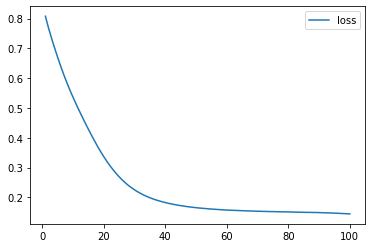

In [18]:
# Create a DataFrame with the history dictionary
df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df.plot(y="loss")

<AxesSubplot:>

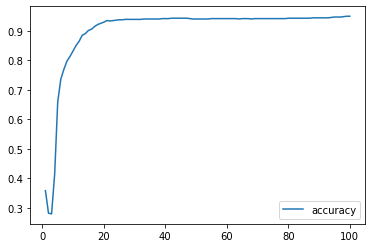

In [19]:
# Plot the accuracy
df.plot(y="accuracy")

 #### Evaluating the Model Using Testing Data

In [20]:
# Evaluate the model fit with linear dummy data
model_loss, model_accuracy = neuron.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.1162 - accuracy: 0.9640 - 198ms/epoch - 25ms/step
Loss: 0.11616694182157516, Accuracy: 0.9639999866485596


 ### Making Predictions

In [29]:
# Making predictions
predictions = (neuron.predict(X_test_scaled) > 0.5).astype("int32") # This is essentially doing the rounding up from 0.5001 to 1 or down from 0.5 to 0.
predictions
results = pd.DataFrame({"predictions": predictions.ravel(), "actual": y_test.ravel()})
results.head(10)

8/8 [==============================] - 0s 2ms/step


,predictions,actual
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
5,1,0
6,0,0
7,0,0
8,0,0
9,0,0
